##**Hand Written Digit Prediction - Classification Analysis**

The digit dataset consists of 8x8 pixel image of digits. The image attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

**Import Library**

In [ ]:
import pycaret
from pycaret.classification import *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

In [ ]:
from sklearn.datasets import load_digits
df = load_digits()

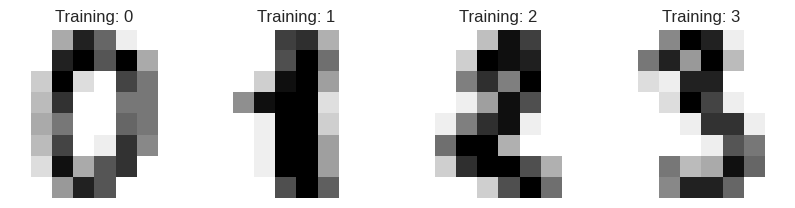

In [ ]:
_, axes =  plt.subplots(nrows =1, ncols = 4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
  ax.set_title("Training: %i" % label)

**Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

**Scaling image data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(data, df.target, test_size= 0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
rf = SVC()

In [ ]:
rf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Predict Test Data**

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([2, 0, 4, 1, 0, 1, 1, 1, 5, 6, 6, 0, 0, 4, 5, 0, 2, 6, 2, 4, 5, 4,
       0, 1, 3, 0, 7, 2, 6, 1, 6, 8, 3, 9, 1, 4, 5, 6, 2, 0, 4, 9, 0, 9,
       3, 9, 3, 6, 5, 7, 5, 7, 3, 1, 9, 3, 5, 9, 3, 0, 1, 7, 6, 0, 4, 2,
       6, 9, 8, 2, 1, 6, 8, 5, 7, 3, 0, 7, 7, 2, 9, 2, 5, 0, 7, 3, 7, 9,
       4, 5, 0, 1, 8, 6, 0, 3, 0, 7, 3, 6, 8, 5, 8, 9, 8, 1, 2, 0, 3, 6,
       9, 0, 6, 3, 9, 4, 2, 0, 3, 5, 6, 2, 2, 1, 8, 1, 5, 3, 0, 1, 4, 0,
       4, 0, 8, 7, 1, 1, 0, 4, 6, 9, 0, 9, 7, 2, 7, 4, 3, 7, 8, 4, 2, 5,
       6, 4, 8, 3, 7, 1, 3, 5, 7, 7, 6, 6, 6, 3, 2, 2, 0, 9, 2, 7, 9, 6,
       7, 8, 0, 8, 0, 1, 4, 9, 1, 5, 9, 5, 3, 3, 3, 8, 1, 5, 7, 2, 7, 8,
       9, 6, 6, 2, 8, 0, 0, 2, 0, 8, 4, 5, 0, 2, 0, 1, 5, 9, 4, 6, 6, 7,
       5, 8, 1, 7, 0, 9, 4, 1, 2, 7, 3, 0, 2, 1, 8, 9, 9, 7, 1, 1, 8, 3,
       4, 9, 9, 9, 7, 3, 0, 4, 2, 4, 1, 7, 2, 4, 7, 0, 2, 1, 4, 1, 6, 0,
       6, 6, 5, 2, 6, 5, 4, 7, 0, 9, 7, 7, 3, 9, 6, 6, 7, 6, 1, 7, 8, 9,
       7, 4, 2, 3, 0, 6, 4, 6, 5, 3, 6, 0, 6, 6, 4,

**Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 48,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 57]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.98      1.00      0.99        54
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        54
           4       1.00      0.98      0.99        46
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        59
           7       1.00      0.98      0.99        57
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        58

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



**Conclusion**

I have achieved **99%** of accuracy for this dataset using Support Vector Classifier